В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
medical_df = pd.read_csv("C:/Users/linam/ML_Projects/Lectures/2.1/medical-charges.csv") # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

##### Метод МНК

In [14]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [15]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(array([18, 28, 33]),
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [16]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([-2091.42055657,   267.24891283])

In [17]:
np.dot(X_with_intercept[0], MNK_coefs)

np.float64(2719.059874396516)

In [18]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [19]:
predictions_MNK[:3], y[:3]

(array([2719.0598744 , 5391.54900271, 6727.79356686]),
 array([ 1725.5523 ,  4449.462  , 21984.47061]))

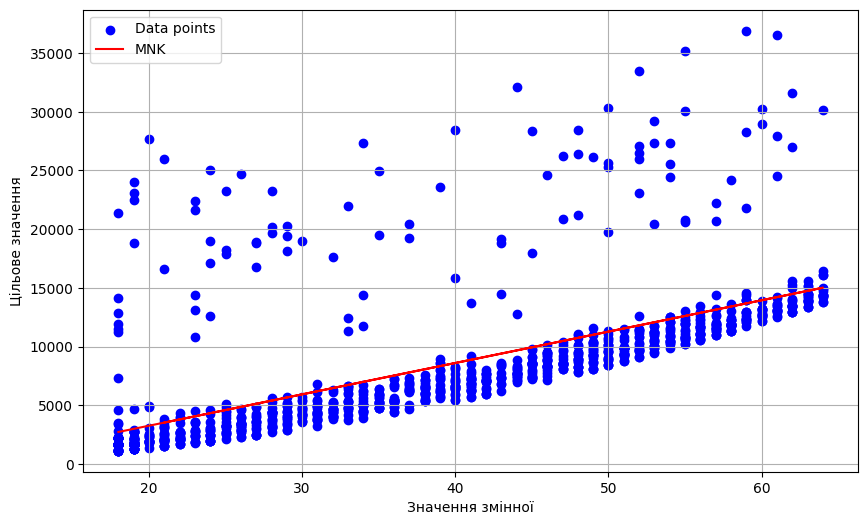

In [21]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
#те саме

#Підготовка даних
X = non_smoker_df['age'].values  # Незалежна змінна
y = non_smoker_df['charges'].values  # Залежна змінна

# Додамо одиничний стовпець для вільного члена (зсуву)
X_design = np.vstack([X, np.ones_like(X)]).T  # Формат матриці (n_samples, 2)

# Метод найменших квадратів для розрахунку коефіцієнтів
theta_mnk = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

# Розпаковка коефіцієнтів
slope, intercept = theta_mnk
print("Нахил (slope):", slope)
print("Перетин (intercept):", intercept)

Нахил (slope): 267.2489128311997
Перетин (intercept): -2091.4205565650877


##### Full-Batch градієнтного спуску

In [25]:
X = non_smoker_df['age'].values.reshape(-1, 1)  # Перетворюємо на 2D-масив
y = non_smoker_df['charges'].values

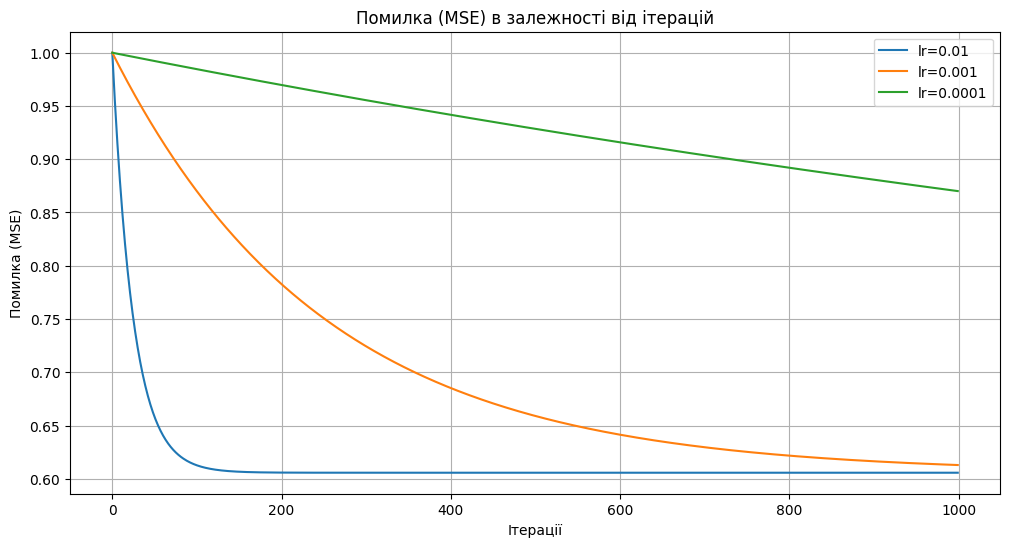

In [31]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    
    for _ in range(epochs):
        # Передбачення
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        
        # Середньоквадратична помилка
        mse = np.mean(error**2)
        errors.append(mse)
        
        # Градієнти
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        
        # Оновлення параметрів
        m = m - lr * m_gradient
        b = b - lr * b_gradient

        # Перевірка на числову стабільність
        if not np.isfinite(m) or not np.isfinite(b):
            print(f"Переповнення: m={m}, b={b}, на ітерації {_}")
            break
            
    return m, b, errors

# Масштабування даних
X_scaled = (X - np.mean(X)) / np.std(X)
y_scaled = (y - np.mean(y)) / np.std(y)

# Тестуємо модель
learning_rates = [0.01, 0.001, 0.0001]
results = {}

for lr in learning_rates:
    m, b, errors = full_batch_gradient_descent(X_scaled, y_scaled, lr=lr, epochs=1000)
    results[lr] = {'m': m, 'b': b, 'errors': errors}

# Візуалізація помилок
plt.figure(figsize=(12, 6))
for lr, result in results.items():
    plt.plot(result['errors'], label=f'lr={lr}')
plt.title('Помилка (MSE) в залежності від ітерацій')
plt.xlabel('Ітерації')
plt.ylabel('Помилка (MSE)')
plt.legend()
plt.grid(True)
plt.show()

Хоч показує, що при lr = 0.01 помилки найкраще прямують до нуля, для наших даних краще використовувати 0,0001, так як швидкість навчання занадто велика при 0,01, параметри (m, b) оновлюються надто агресивно, і значення помилки стрімко ростуть, що викликає переповнення.

In [54]:
def full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X[:, 0] + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X[:, 0])
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=0.0001, epochs=1000)
predictions_fbgd = m * X[:, 0] + b

m, b

(np.float64(221.1045843794301), np.float64(-41.98126853149978))

##### Модель лінійної регресії засобами Scikit-learn 

In [33]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()

In [34]:
lin_reg
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [35]:
predictions_sklearn = lin_reg.predict(X)

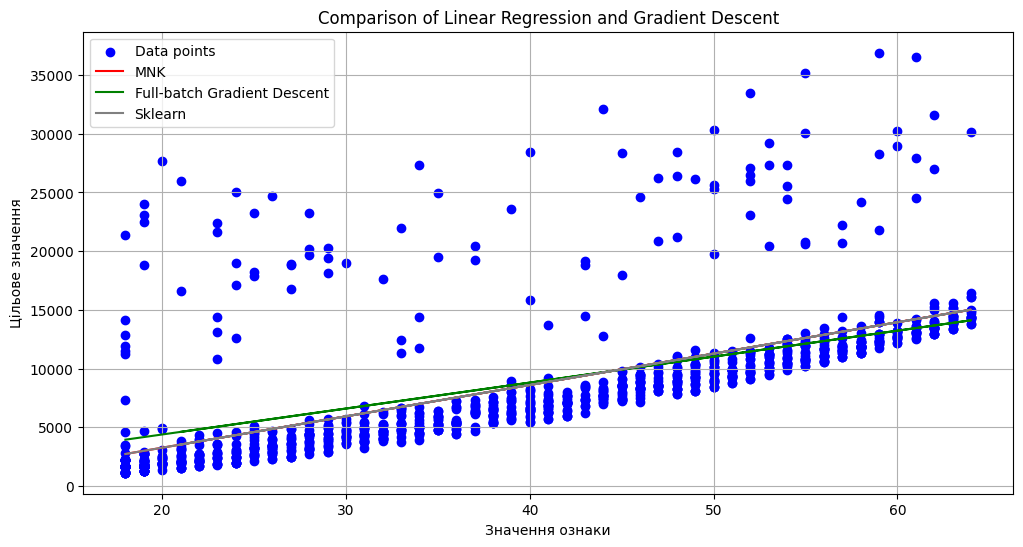

In [55]:
# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

rmse_gd = calculate_rmse(y, m * X + b)
rmse_mnk = calculate_rmse(y, predictions_MNK)
rmse_sklearn = calculate_rmse(y, predictions_sklearn)

print(f"RMSE (Gradient Descent): {rmse_gd}")
print(f"RMSE (MNK): {rmse_mnk}")
print(f"RMSE (Scikit-learn): {rmse_sklearn}")

RMSE (Gradient Descent): 6755.204973460312
RMSE (MNK): 4662.505766636395
RMSE (Scikit-learn): 4662.505766636395


##### Висновок
Результати для методів MNK і Scikit-learn збігаються (що недивно, так як Scikit-learn також використовує МНК), і візуально мають кращі результати, аніж градіентний спуск.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [59]:
# Відбір курців
smoker_df = medical_df[medical_df['smoker'] == 'yes']

In [60]:
# Вибір потрібних змінних
X = smoker_df['age'].to_frame()  # X має бути у вигляді DataFrame
y = smoker_df['charges']  # y - це цільова змінна

In [61]:
# Створення та тренування моделі
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [62]:
# Прогнози
predictions = model.predict(X)

# Виведення коефіцієнтів моделі
slope = model.coef_[0]
intercept = model.intercept_

print(f"Коефіцієнти моделі:")
print(f"Нахил (slope): {slope}")
print(f"Перетин (intercept): {intercept}")

Коефіцієнти моделі:
Нахил (slope): 305.23760210982874
Перетин (intercept): 20294.12812691597


In [63]:
# Точність моделі (RMSE)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(f"Точність моделі (RMSE): {rmse}")

Точність моделі (RMSE): 10711.00334810241


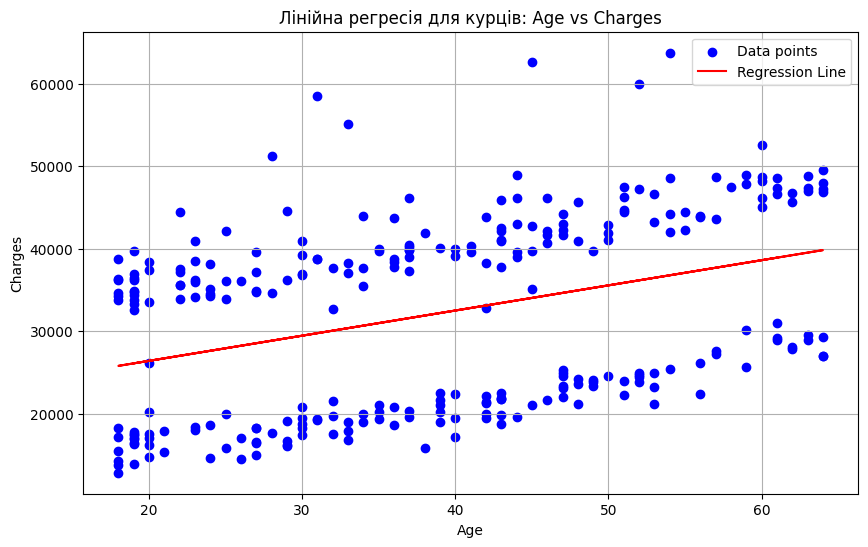

In [64]:
# Візуалізація
plt.figure(figsize=(10, 6))
plt.scatter(smoker_df['age'], smoker_df['charges'], color='blue', label='Data points')
plt.plot(smoker_df['age'], predictions, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Лінійна регресія для курців: Age vs Charges')
plt.legend()
plt.grid(True)
plt.show()

##### Висновок

Модель показує загальну лінійну тенденцію: із збільшенням віку зростають медичні збори.
Проте велике значення RMSE свідчить про те, що лінійна модель не повністю враховує всі чинники. Наприклад, фактори, як-от BMI, регіон проживання, або навіть взаємозв’язок між віком і станом здоров'я, можуть впливати на charges.

RMSE: 10711.00
Цей показник свідчить про середнє відхилення прогнозів моделі від фактичних значень.

Можна сказати, що ця модель є недостатньо хорошою для точного прогнозування медичних зборів у курців.